# Calculation of Sentinel-2 Biophysical Phenological Metrics

In [1]:
import os
import yaml
from munch import munchify

### _Setup configuration and environment_

In [2]:
# define repo name and get root working directory
repo = 'statistical'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]

# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path = os.path.join( cfg_path, 'sentinel-2' )

In [3]:
# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path = os.path.join( cfg_path, 'sentinel-2' )
cfg_path

'C:\\Users\\crwil\\Documents\\GitHub\\sentinelhub\\apis\\statistical\\cfg\\sentinel-2'

In [4]:
# get pathname to configuration file
cfg_file = os.path.join( cfg_path, 's2-biophysical.yml' )

In [5]:
# print contents of configuration file
with open( cfg_file ) as f:
    print ( f.read() )

request:
    evalscript: |
                //VERSION=3
                function setup() {
                    return {
                        input: [{
                            bands: [
                                "B03",
                                "B04",
                                "B05",
                                "B06",
                                "B07",
                                "B8A",
                                "B11",
                                "B12",
                                "SCL",
                                "CLM",
                                "viewZenithMean",
                                "viewAzimuthMean",
                                "sunZenithAngles",
                                "sunAzimuthAngles",
                                "dataMask"
                            ]
                        }],
                        output: [
                        {
                            id: "stats",
              

In [6]:
# load cfg file using yaml parser
with open( cfg_file, 'r' ) as f:
    config = munchify( yaml.safe_load( f ) )

### _Replicate use case results taken from Sentinel-Hub documentation_

In [7]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon

coords = "[ [ [ 458085.878866, 5097236.833044 ], [ 457813.834156, 5096808.351383 ], [ 457979.897062, 5096313.767184 ],  [ 458146.639373, 5096405.411294 ], [ 458085.878866, 5097236.833044 ] ] ]"

df = pd.DataFrame([["Polygon", coords ]], columns=["type", "coords"])
gdf = gpd.GeoDataFrame( geometry=gpd.GeoSeries( Polygon(eval(df.coords.iloc[0])[0] ) ) )
gdf = gdf.set_crs( 32633 )
gdf

,geometry
0,"POLYGON ((458085.879 5097236.833, 457813.834 5..."


In [8]:
gdf = gdf.to_crs(4326)
bounds = gdf.bounds.values[ 0 ]
cx = (bounds[ 2 ] + bounds[ 0 ]) / 2.0
cy = (bounds[ 3 ] + bounds[ 1 ]) / 2.0
cx, cy

(14.457122499992728, 46.02326499999474)

In [9]:
import folium
m = folium.Map(location=[ cy, cx ], zoom_start=14, tiles='CartoDB positron')

for _, r in gdf.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    geo_j.add_to(m)
m

In [10]:
# define aggregation timeframe
from datetime import datetime
timeframe = { 'start' : datetime.strptime('2020-01-01', '%Y-%m-%d'), 
              'end' : datetime.strptime('2020-12-31', '%Y-%m-%d') }

In [11]:
# create instance of shclient class
from statisticalapi import Client
client = Client( config )

In [12]:
# submit request
gdf = gdf.to_crs( 32633 )
response = client.getStatistics( [ timeframe ], resolution=10, polygons=gdf, interval='P1D' )

In [13]:
df = response._dfs[ 0 ]
df = df[ df[ 'stats_clm_mean' ] < 0.1 ]
df

,id,interval_from,interval_to,stats_lai_min,stats_lai_max,stats_lai_mean,stats_lai_stDev,stats_lai_sampleCount,stats_lai_noDataCount,stats_fapar_min,...,stats_ccc_mean,stats_ccc_stDev,stats_ccc_sampleCount,stats_ccc_noDataCount,stats_clm_min,stats_clm_max,stats_clm_mean,stats_clm_stDev,stats_clm_sampleCount,stats_clm_noDataCount
0,geom_0,2020-01-06,2020-01-07,0.085387,0.259429,0.168349,0.036066,3036,2776,0.396125,...,20.003743,7.704064,3036,2776,0.0,0.0,0.000000,0.00000,3036,2776
2,geom_0,2020-01-16,2020-01-17,0.169369,0.221811,0.191286,0.013451,3036,3009,0.498233,...,16.330639,2.445965,3036,3009,0.0,0.0,0.000000,0.00000,3036,3009
3,geom_0,2020-01-21,2020-01-22,0.092011,0.234081,0.171722,0.031973,3036,2997,0.408990,...,16.409141,5.190913,3036,2997,0.0,0.0,0.000000,0.00000,3036,2997
4,geom_0,2020-02-05,2020-02-06,0.108573,0.241528,0.163563,0.037650,3036,2956,0.390594,...,17.388597,8.203889,3036,2956,0.0,0.0,0.000000,0.00000,3036,2956
5,geom_0,2020-03-11,2020-03-12,0.058556,0.283462,0.153985,0.039070,3036,1408,0.190997,...,14.914907,7.183296,3036,1408,0.0,0.0,0.000000,0.00000,3036,1408
6,geom_0,2020-03-16,2020-03-17,0.073261,0.300831,0.189725,0.037432,3036,1238,0.191355,...,20.204299,7.558259,3036,1238,0.0,0.0,0.000000,0.00000,3036,1238
8,geom_0,2020-04-05,2020-04-06,0.141234,0.468009,0.307859,0.047279,3036,1192,0.218490,...,42.066380,11.634236,3036,1192,0.0,0.0,0.000000,0.00000,3036,1192
9,geom_0,2020-04-10,2020-04-11,0.170583,0.546664,0.335605,0.049954,3036,1192,0.239529,...,47.626259,13.727611,3036,1192,0.0,0.0,0.000000,0.00000,3036,1192
10,geom_0,2020-04-15,2020-04-16,0.275949,0.700178,0.449949,0.059098,3036,1192,0.332993,...,85.503895,25.543222,3036,1192,0.0,0.0,0.000000,0.00000,3036,1192
11,geom_0,2020-04-25,2020-04-26,0.419846,0.756846,0.552349,0.051387,3036,1192,0.453968,...,118.960187,27.350401,3036,1192,0.0,0.0,0.000000,0.00000,3036,1192


In [14]:
df.loc[ :, 'datetime' ] = pd.to_datetime( df[ 'interval_from'] )
df

C:\Users\crwil\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,id,interval_from,interval_to,stats_lai_min,stats_lai_max,stats_lai_mean,stats_lai_stDev,stats_lai_sampleCount,stats_lai_noDataCount,stats_fapar_min,...,stats_ccc_stDev,stats_ccc_sampleCount,stats_ccc_noDataCount,stats_clm_min,stats_clm_max,stats_clm_mean,stats_clm_stDev,stats_clm_sampleCount,stats_clm_noDataCount,datetime
0,geom_0,2020-01-06,2020-01-07,0.085387,0.259429,0.168349,0.036066,3036,2776,0.396125,...,7.704064,3036,2776,0.0,0.0,0.000000,0.00000,3036,2776,2020-01-06
2,geom_0,2020-01-16,2020-01-17,0.169369,0.221811,0.191286,0.013451,3036,3009,0.498233,...,2.445965,3036,3009,0.0,0.0,0.000000,0.00000,3036,3009,2020-01-16
3,geom_0,2020-01-21,2020-01-22,0.092011,0.234081,0.171722,0.031973,3036,2997,0.408990,...,5.190913,3036,2997,0.0,0.0,0.000000,0.00000,3036,2997,2020-01-21
4,geom_0,2020-02-05,2020-02-06,0.108573,0.241528,0.163563,0.037650,3036,2956,0.390594,...,8.203889,3036,2956,0.0,0.0,0.000000,0.00000,3036,2956,2020-02-05
5,geom_0,2020-03-11,2020-03-12,0.058556,0.283462,0.153985,0.039070,3036,1408,0.190997,...,7.183296,3036,1408,0.0,0.0,0.000000,0.00000,3036,1408,2020-03-11
6,geom_0,2020-03-16,2020-03-17,0.073261,0.300831,0.189725,0.037432,3036,1238,0.191355,...,7.558259,3036,1238,0.0,0.0,0.000000,0.00000,3036,1238,2020-03-16
8,geom_0,2020-04-05,2020-04-06,0.141234,0.468009,0.307859,0.047279,3036,1192,0.218490,...,11.634236,3036,1192,0.0,0.0,0.000000,0.00000,3036,1192,2020-04-05
9,geom_0,2020-04-10,2020-04-11,0.170583,0.546664,0.335605,0.049954,3036,1192,0.239529,...,13.727611,3036,1192,0.0,0.0,0.000000,0.00000,3036,1192,2020-04-10
10,geom_0,2020-04-15,2020-04-16,0.275949,0.700178,0.449949,0.059098,3036,1192,0.332993,...,25.543222,3036,1192,0.0,0.0,0.000000,0.00000,3036,1192,2020-04-15
11,geom_0,2020-04-25,2020-04-26,0.419846,0.756846,0.552349,0.051387,3036,1192,0.453968,...,27.350401,3036,1192,0.0,0.0,0.000000,0.00000,3036,1192,2020-04-25


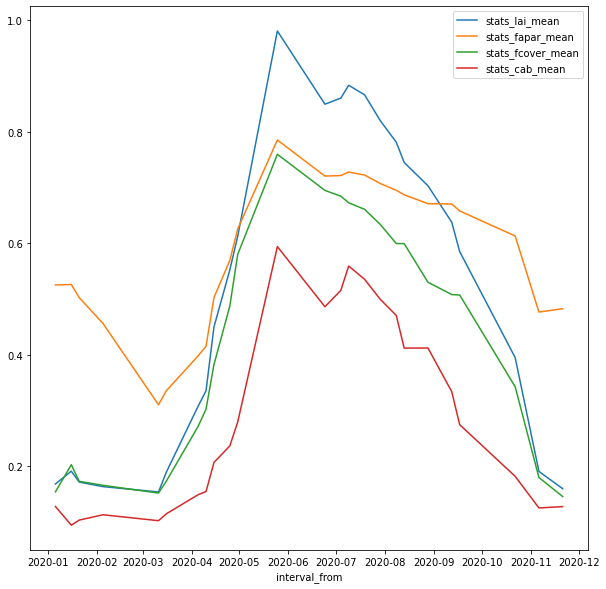

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots( figsize=(10,10), nrows=1, ncols=1 )
for parameter in [ 'lai', 'fapar', 'fcover', 'cab' ]:
    df.plot( ax=ax, x='interval_from', y=f'stats_{parameter}_mean' )

In [16]:
drop_columns = list()
for column in df.columns:
    
    if not ( 'mean' in column or 'datetime' in column ):
        drop_columns.append( column )

drop_columns.extend( [ 'stats_clm_mean', 'index' ] )

In [17]:
df = df.reset_index().set_index( 'datetime' )
df = df.drop( drop_columns, axis=1 )
df

,stats_lai_mean,stats_fapar_mean,stats_cab_mean,stats_fcover_mean,stats_ccc_mean
datetime,,,,,
2020-01-06,0.168349,0.525421,0.127904,0.154178,20.003743
2020-01-16,0.191286,0.526145,0.094391,0.202889,16.330639
2020-01-21,0.171722,0.502644,0.103506,0.173114,16.409141
2020-02-05,0.163563,0.456229,0.113096,0.165878,17.388597
2020-03-11,0.153985,0.310491,0.102449,0.152000,14.914907
2020-03-16,0.189725,0.335747,0.114842,0.173652,20.204299
2020-04-05,0.307859,0.398146,0.149092,0.271625,42.066380
2020-04-10,0.335605,0.415271,0.154585,0.302584,47.626259
2020-04-15,0.449949,0.502700,0.206976,0.382410,85.503895


In [18]:
ds = df.to_xarray()
ds

<xarray.Dataset>
Dimensions:            (datetime: 25)
Coordinates:
  * datetime           (datetime) datetime64[ns] 2020-01-06 ... 2020-11-21
Data variables:
    stats_lai_mean     (datetime) float64 0.1683 0.1913 0.1717 ... 0.1908 0.1598
    stats_fapar_mean   (datetime) float64 0.5254 0.5261 0.5026 ... 0.4767 0.4828
    stats_cab_mean     (datetime) float64 0.1279 0.09439 ... 0.1253 0.1277
    stats_fcover_mean  (datetime) float64 0.1542 0.2029 0.1731 ... 0.1799 0.1457
    stats_ccc_mean     (datetime) float64 20.0 16.33 16.41 ... 65.56 22.14 19.22

In [19]:
ds = ds.resample(datetime='1W').mean('datetime')
ds = ds.interpolate_na(dim='datetime', method='linear')

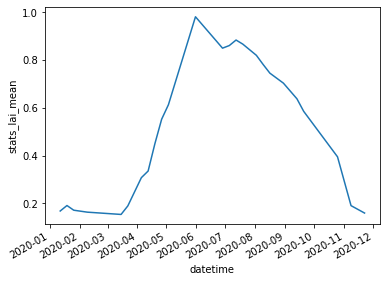

In [20]:
da = ds.stats_lai_mean
da.plot.line(x='datetime')

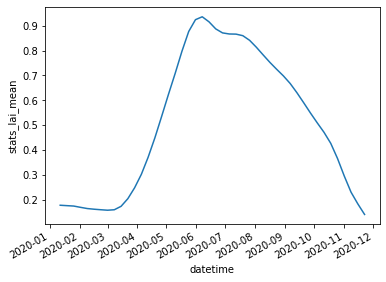

In [21]:
import numpy as np
from tsmoothie.smoother import LowessSmoother

def smoothTimeSeries( da, smooth_fraction=0.1, iterations=1 ):

    # operate smoothing - many options here
    smoother = LowessSmoother(smooth_fraction=smooth_fraction, iterations=iterations)
    return np.ravel( smoother.smooth( da ).smooth_data )
    
da.loc[ : ] = smoothTimeSeries( da )
da.plot.line(x='datetime')

In [22]:
metrics = dict()

In [23]:
import math
from scipy.signal import find_peaks

def getPeaks( da ):

    # get height (val at 75% threshold) and dist between peaks - assume 4 seasons
    height = np.nanquantile( ds.stats_lai_mean, q=0.75)
    distance = math.ceil( len( ds.stats_lai_mean ) / 4)
    
    return find_peaks( da, 
                    height=height, 
                    distance=distance )
    

In [24]:
peaks = getPeaks( da )
metrics[ 'num_peaks' ] = len( peaks[ 0 ] )
metrics

{'num_peaks': 1}

In [25]:
def getPeakofSeason( da ):
    return float( da.max('datetime').values ), da.argmax( 'datetime', skipna=True)

value, idx = getPeakofSeason( da )
metrics[ 'pos' ] = { 'value' : value, 'doy' : int( da['datetime.dayofyear'].isel(datetime=idx, drop=True).values ) }
metrics

{'num_peaks': 1, 'pos': {'value': 0.935624833089935, 'doy': 159}}

In [26]:
def getValleyofSeason( da ):
    return float( da.min('datetime').values ), da.argmin( 'datetime', skipna=True )

value, idx = getValleyofSeason( da )
metrics[ 'vos' ] = { 'value' : value, 'doy' : int( ds['datetime.dayofyear'].isel(datetime=idx, drop=True).values ) }
metrics

{'num_peaks': 1,
 'pos': {'value': 0.935624833089935, 'doy': 159},
 'vos': {'value': 0.14081095993307446, 'doy': 327}}

In [28]:
# middle of season is calculated as the mean value 
# at 80% to left and right of the peak of season (pos)

def getMiddleofSeason( da, pos ):
        
    slope_l = da.where(da['datetime.dayofyear'] <= pos[ 'doy' ] )
    slope_r = da.where(da['datetime.dayofyear'] >= pos[ 'doy' ] )
        
    # getupper 80% values in positive slope on left and right
    slope_l_upper = slope_l.where(slope_l >= (slope_l.max('datetime') * 0.8))
    slope_r_upper = slope_r.where(slope_r >= (slope_r.max('datetime') * 0.8))

    # get means of slope left and right
    slope_l_mean = slope_l_upper.mean('datetime')
    slope_r_mean = slope_r_upper.mean('datetime')

    # combine left and right veg_index means
    return float ( ( (slope_l_mean + slope_r_mean) / 2 ).values )

# get middle of season
metrics[ 'mos' ] = { 'value' : getMiddleofSeason( da, metrics[ 'pos' ] ) }
metrics

{'num_peaks': 1,
 'pos': {'value': 0.935624833089935, 'doy': 159},
 'vos': {'value': 0.14081095993307446, 'doy': 327},
 'mos': {'value': 0.8684110878269709}}

In [29]:
# base value is calculated as mean value of two minimum values; 
# [1] the min of the slope to the left of peak of season, and
# [2] the min of the slope to the right of the peak of season.

def getBaseValue( da, pos ):
        
    # split timeseries into left and right slopes via provided peak/middle values
    slope_l = da.where(da['datetime.dayofyear'] <= pos[ 'doy' ] ).min('datetime')
    slope_r = da.where(da['datetime.dayofyear'] >= pos[ 'doy' ] ).min('datetime')

    # get per pixel mean of both left and right slope min values 
    return float( ( (slope_l + slope_r) / 2 ).values )
    
# get middle of season
metrics[ 'bse' ] = { 'value' : getBaseValue( da, metrics[ 'pos' ] ) }
metrics

{'num_peaks': 1,
 'pos': {'value': 0.935624833089935, 'doy': 159},
 'vos': {'value': 0.14081095993307446, 'doy': 327},
 'mos': {'value': 0.8684110878269709},
 'bse': {'value': 0.14931358593772337}}

In [30]:
# amplitude is the difference between highest and lowest value
def getAmplitude( pos, bse ):    
    return pos[ 'value' ] - bse[ 'value' ]

metrics[ 'aos' ] = getAmplitude( metrics[ 'pos'], metrics[ 'bse'] )
metrics

{'num_peaks': 1,
 'pos': {'value': 0.935624833089935, 'doy': 159},
 'vos': {'value': 0.14081095993307446, 'doy': 327},
 'mos': {'value': 0.8684110878269709},
 'bse': {'value': 0.14931358593772337},
 'aos': 0.7863112471522117}

In [31]:
import xarray as xr

class StartofSeason():
    
    @staticmethod
    def getFirstofSlope( da, peak ):
        
        print ( da )

        # get left slopes values, calc differentials 
        slope_l = da.where(da['datetime.dayofyear'] <= peak[ 'doy'] )
        slope_l_diffs = slope_l.differentiate('datetime')
        
        # subset to positive differentials
        slope_l_pos_diffs = xr.where(slope_l_diffs > 0, True, False)

        # select vege values where positive on left slope
        slope_l_pos = slope_l.where( slope_l_pos_diffs )

        # get median of vege on pos left slope, calc vege dists from median
        slope_l_med = slope_l_pos.median('datetime')
        dists_from_median = slope_l_pos - slope_l_med 

        # get time index where min dist from median (first on slope)
        i = dists_from_median.argmin('datetime', skipna=True)

        # get vege start of season values and times (day of year)
        return float( slope_l_pos.isel(datetime=i, drop=True).values ), \
                int( slope_l_pos['datetime.dayofyear'].isel(datetime=i, drop=True).values )
    
    @staticmethod
    def getMedianofSlope( da, peak ):

        # get left slopes values, calc differentials, subset to positive differentials
        slope_l = da.where(da['datetime.dayofyear'] <= peak[ 'doy'] )
        slope_l_diffs = slope_l.differentiate('datetime')
        slope_l_pos_diffs = xr.where(slope_l_diffs > 0, True, False)

        # select vege values where positive on left slope
        slope_l_pos = slope_l.where(slope_l_pos_diffs)

        # get median of vege on pos left slope, calc absolute vege dists from median
        slope_l_med = slope_l_pos.median('datetime')
        dists_from_median = slope_l_pos - slope_l_med
        dists_from_median = abs(dists_from_median)

        # get time index where min absolute dist from median (median on slope)
        i = dists_from_median.argmin('datetime', skipna=True)

        # get vege start of season values and times (day of year)
        return float( slope_l_pos.isel(datetime=i, drop=True).values ), \
                int( slope_l_pos['datetime.dayofyear'].isel(datetime=i, drop=True).values )


In [32]:
# compute start of season
value, doy = StartofSeason.getFirstofSlope( da, metrics[ 'pos' ] )
metrics[ 'sos' ] = { 'value' : value, 'doy' : doy }
metrics

<xarray.DataArray 'stats_lai_mean' (datetime: 46)>
array([0.17781531, 0.17616157, 0.17453848, 0.16940858, 0.16455103,
       0.16186404, 0.15973187, 0.15781621, 0.15966818, 0.1735085 ,
       0.20414121, 0.24799215, 0.30222563, 0.37080765, 0.44897939,
       0.53521545, 0.6231019 , 0.70809107, 0.79694725, 0.87645528,
       0.92395998, 0.93562483, 0.91528636, 0.88683004, 0.87080209,
       0.86643091, 0.86583543, 0.85960732, 0.84100798, 0.81314699,
       0.78240764, 0.75234914, 0.72455078, 0.69789129, 0.66740469,
       0.63025122, 0.58993981, 0.54870964, 0.50922049, 0.47118675,
       0.4267369 , 0.36584594, 0.29521434, 0.2303619 , 0.18340837,
       0.14081096])
Coordinates:
  * datetime  (datetime) datetime64[ns] 2020-01-12 2020-01-19 ... 2020-11-22


{'num_peaks': 1,
 'pos': {'value': 0.935624833089935, 'doy': 159},
 'vos': {'value': 0.14081095993307446, 'doy': 327},
 'mos': {'value': 0.8684110878269709},
 'bse': {'value': 0.14931358593772337},
 'aos': 0.7863112471522117,
 'sos': {'value': 0.15966818240340044, 'doy': 68}}

In [33]:
class EndofSeason():
    
    @staticmethod
    def getFirstofSlope( da, peak_doy ):
                    
        # get right slopes values, calc differentials, subset to negative differentials
        slope_r = da.where(da['datetime.dayofyear'] >= peak_doy )
        slope_r_diffs = slope_r.differentiate('datetime')
        slope_r_neg_diffs = xr.where(slope_r_diffs < 0, True, False)
                
        # select vege values where negative on right slope
        slope_r_neg = slope_r.where(slope_r_neg_diffs)
        
        # get median of vege on neg right slope, calc vege dists from median
        slope_r_med = slope_r_neg.median('datetime')
        dists_from_median = slope_r_neg - slope_r_med 
                
        # get time index where min dist from median (first on slope)
        i = dists_from_median.argmin('datetime', skipna=True)
        
        # get vege end of season values and times (day of year)
        return float( slope_r_neg.isel(datetime=i, drop=True).values ), \
                    int( slope_r_neg['datetime.dayofyear'].isel(datetime=i, drop=True) )
    
    @staticmethod
    def getMedianofSlope( da, peak_doy ):
    
        # get right slopes values, calc differentials, subset to positive differentials
        slope_r = da.where(da['datetime.dayofyear'] >= peak_doy)
        slope_r_diffs = slope_r.differentiate('datetime')
        slope_r_neg_diffs = xr.where(slope_r_diffs < 0, True, False)
                
        # select vege values where negative on right slope
        slope_r_neg = slope_r.where(slope_r_neg_diffs)
        
        # get median of vege on neg right slope, calc absolute vege dists from median
        slope_r_med = slope_r_neg.median('datetime')
        dists_from_median = slope_r_neg - slope_r_med
        dists_from_median = abs(dists_from_median)
                
        # get time index where min absolute dist from median (median on slope)
        i = dists_from_median.argmin('datetime', skipna=True)
        
        # get vege start of season values and times (day of year)
        return float( slope_r_neg.isel(datetime=i, drop=True).values ), \
                int( slope_r_neg['datetime.dayofyear'].isel(datetime=i, drop=True).values )            

In [34]:
# compute start of season
value, doy = EndofSeason.getMedianofSlope( da, metrics[ 'pos' ][ 'doy' ] )
metrics[ 'eos' ] = { 'value' : value, 'doy' : doy }
metrics

{'num_peaks': 1,
 'pos': {'value': 0.935624833089935, 'doy': 159},
 'vos': {'value': 0.14081095993307446, 'doy': 327},
 'mos': {'value': 0.8684110878269709},
 'bse': {'value': 0.14931358593772337},
 'aos': 0.7863112471522117,
 'sos': {'value': 0.15966818240340044, 'doy': 68},
 'eos': {'value': 0.69789129284237, 'doy': 243}}

In [35]:
# get length of season in days
def getLengthofSeason( sos, eos ):
    return eos - sos

metrics[ 'los' ] = { 'value' : getLengthofSeason( metrics[ 'sos'][ 'doy' ], metrics[ 'eos'][ 'doy'] ) }
metrics

{'num_peaks': 1,
 'pos': {'value': 0.935624833089935, 'doy': 159},
 'vos': {'value': 0.14081095993307446, 'doy': 327},
 'mos': {'value': 0.8684110878269709},
 'bse': {'value': 0.14931358593772337},
 'aos': 0.7863112471522117,
 'sos': {'value': 0.15966818240340044, 'doy': 68},
 'eos': {'value': 0.69789129284237, 'doy': 243},
 'los': {'value': 175}}

In [36]:
def getRateofIncrease( peak, sos ):
    return ( peak[ 'value' ] - sos[ 'value' ] ) / ( peak[ 'doy' ] - sos[ 'doy' ] )

metrics[ 'roi' ] = { 'value' : getRateofIncrease( metrics[ 'pos' ], metrics[ 'sos' ] ) }
metrics

{'num_peaks': 1,
 'pos': {'value': 0.935624833089935, 'doy': 159},
 'vos': {'value': 0.14081095993307446, 'doy': 327},
 'mos': {'value': 0.8684110878269709},
 'bse': {'value': 0.14931358593772337},
 'aos': 0.7863112471522117,
 'sos': {'value': 0.15966818240340044, 'doy': 68},
 'eos': {'value': 0.69789129284237, 'doy': 243},
 'los': {'value': 175},
 'roi': {'value': 0.00852699616139049}}

In [37]:
def getRateofDecrease( peak, eos ):
    return abs( ( eos[ 'value' ] - peak[ 'value' ] ) / ( eos[ 'doy' ] - peak[ 'doy' ] ) )

metrics[ 'rod' ] = { 'value' : getRateofDecrease( metrics[ 'pos' ], metrics[ 'eos' ] ) }
metrics

{'num_peaks': 1,
 'pos': {'value': 0.935624833089935, 'doy': 159},
 'vos': {'value': 0.14081095993307446, 'doy': 327},
 'mos': {'value': 0.8684110878269709},
 'bse': {'value': 0.14931358593772337},
 'aos': 0.7863112471522117,
 'sos': {'value': 0.15966818240340044, 'doy': 68},
 'eos': {'value': 0.69789129284237, 'doy': 243},
 'los': {'value': 175},
 'roi': {'value': 0.00852699616139049},
 'rod': {'value': 0.002830161193423394}}

In [38]:
from scipy.integrate import trapz

# compute long integral of season (lios) - considered as surrogate of vegetation productivity during growing season
# long integral is calculated via the traperzoidal rule
def getLongIntegralofSeason( da, sos, eos ):
    
    values = da.where((da['datetime.dayofyear'] >= sos[ 'doy' ] ) &
                            (da['datetime.dayofyear'] <= eos[ 'doy' ] ), 0 )
    
    return trapz( values, x=da['datetime.dayofyear'] )
    
metrics[ 'lios' ] = { 'value' : getLongIntegralofSeason( da, metrics[ 'sos'], metrics[ 'eos'] ) }
metrics

{'num_peaks': 1,
 'pos': {'value': 0.935624833089935, 'doy': 159},
 'vos': {'value': 0.14081095993307446, 'doy': 327},
 'mos': {'value': 0.8684110878269709},
 'bse': {'value': 0.14931358593772337},
 'aos': 0.7863112471522117,
 'sos': {'value': 0.15966818240340044, 'doy': 68},
 'eos': {'value': 0.69789129284237, 'doy': 243},
 'los': {'value': 175},
 'roi': {'value': 0.00852699616139049},
 'rod': {'value': 0.002830161193423394},
 'lios': {'value': 120.28005121665225}}

In [39]:
# calculates the short integral of season (sios) - considered to act as a surrogate of vegetation productivity 
# minus the understorey vegetation during growing season. The short integral is calculated 
# via integrating time series with the traperzoidal rule minus the trapezoidal of the base.

def getShortIntegralofSeason( da, sos, eos, bse ):
    
    values = da.where((da['datetime.dayofyear'] >= sos[ 'doy' ] ) &
                            (da['datetime.dayofyear'] <= eos[ 'doy' ] ), 0 )
    
    sios = trapz( values, x=da['datetime.dayofyear'] )
    
    values = xr.where((da['datetime.dayofyear'] >= sos[ 'doy' ] ) &
                            (da['datetime.dayofyear'] <= eos[ 'doy' ] ), bse[ 'value' ],  0 )
    
    sios_base = trapz( values, x=da['datetime.dayofyear'] )
    
     # remove base trapz from sios values
    return sios - sios_base
    
    
metrics[ 'sios' ] = { 'value' : getShortIntegralofSeason( da, metrics[ 'sos'], metrics[ 'eos'], metrics[ 'bse'] ) }
metrics

{'num_peaks': 1,
 'pos': {'value': 0.935624833089935, 'doy': 159},
 'vos': {'value': 0.14081095993307446, 'doy': 327},
 'mos': {'value': 0.8684110878269709},
 'bse': {'value': 0.14931358593772337},
 'aos': 0.7863112471522117,
 'sos': {'value': 0.15966818240340044, 'doy': 68},
 'eos': {'value': 0.69789129284237, 'doy': 243},
 'los': {'value': 175},
 'roi': {'value': 0.00852699616139049},
 'rod': {'value': 0.002830161193423394},
 'lios': {'value': 120.28005121665225},
 'sios': {'value': 93.1049785759866}}

In [40]:
def getLongIntegralofTotal( da ):
    
    return trapz( da, x=da['datetime.dayofyear'] )

metrics[ 'liot' ] = { 'value' : getLongIntegralofTotal( da ) }
metrics

{'num_peaks': 1,
 'pos': {'value': 0.935624833089935, 'doy': 159},
 'vos': {'value': 0.14081095993307446, 'doy': 327},
 'mos': {'value': 0.8684110878269709},
 'bse': {'value': 0.14931358593772337},
 'aos': 0.7863112471522117,
 'sos': {'value': 0.15966818240340044, 'doy': 68},
 'eos': {'value': 0.69789129284237, 'doy': 243},
 'los': {'value': 175},
 'roi': {'value': 0.00852699616139049},
 'rod': {'value': 0.002830161193423394},
 'lios': {'value': 120.28005121665225},
 'sios': {'value': 93.1049785759866},
 'liot': {'value': 163.9717058698416}}

In [41]:
# The siot is considered to act as a surrogate of vegetation productivity minus the understorey vegetation. 
# The short integral is calculated via integrating the array with the traperzoidal rule minus the trapezoidal of the base.

def getShortIntegralofTotal( da, bse ):
    
    siot = trapz( da, x=da['datetime.dayofyear'] )
    
    values = xr.full_like( da, bse[ 'value' ] )    
    siot_base = trapz( values, x=da['datetime.dayofyear'] )
    
    
    return siot - siot_base

metrics[ 'siot' ] = { 'value' : getShortIntegralofTotal( da, metrics[ 'bse' ] ) }
metrics

{'num_peaks': 1,
 'pos': {'value': 0.935624833089935, 'doy': 159},
 'vos': {'value': 0.14081095993307446, 'doy': 327},
 'mos': {'value': 0.8684110878269709},
 'bse': {'value': 0.14931358593772337},
 'aos': 0.7863112471522117,
 'sos': {'value': 0.15966818240340044, 'doy': 68},
 'eos': {'value': 0.69789129284237, 'doy': 243},
 'los': {'value': 175},
 'roi': {'value': 0.00852699616139049},
 'rod': {'value': 0.002830161193423394},
 'lios': {'value': 120.28005121665225},
 'sios': {'value': 93.1049785759866},
 'liot': {'value': 163.9717058698416},
 'siot': {'value': 116.93792629945875}}